In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Настройка стиля
plt.style.use('seaborn-v0_8-darkgrid')  # Пример для matplotlib >= 3.6
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [3]:
# Параметры эксперимента
a = 1
max_points = 10**5
radii = [a/(k+1) for k in range(5)]  # [1.0, 0.5, 0.333..., 0.25, 0.2]
epsilon_values = [10**-i for i in range(1, 5)]  # [0.1, 0.01, 0.001, 0.0001]

In [4]:
# Инициализация генератора случайных чисел
rng = np.random.default_rng(seed=int(time.time()))

In [5]:
def is_in_circle(x, y, r):
    # Проверяет принадлежность точки кругу радиуса r
    return x**2 + y**2 <= r**2

def simulate_points(r, num_points):
    # Генерирует точки и возвращает кумулятивную долю попаданий
    x = rng.uniform(-a, a, num_points)
    y = rng.uniform(-a, a, num_points)
    in_circle = np.cumsum(is_in_circle(x, y, r))
    return in_circle / np.arange(1, num_points + 1)

def find_N_for_epsilon(r, p, epsilon, num_simulations=10):
    # Вычисляет среднее количество точек N для достижения точности epsilon
    N_values = []
    for _ in range(num_simulations):
        x = rng.uniform(-a, a, max_points)
        y = rng.uniform(-a, a, max_points)
        in_circle = np.cumsum(is_in_circle(x, y, r))
        p_hat = in_circle / np.arange(1, max_points + 1)
        error = np.abs(p_hat - p)
        indices = np.where(error <= epsilon)[0]
        N_values.append(indices[0] + 1 if len(indices) > 0 else max_points)
    return np.mean(N_values) if N_values else max_points

<ipython-input-6-8f0afd53b896>:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


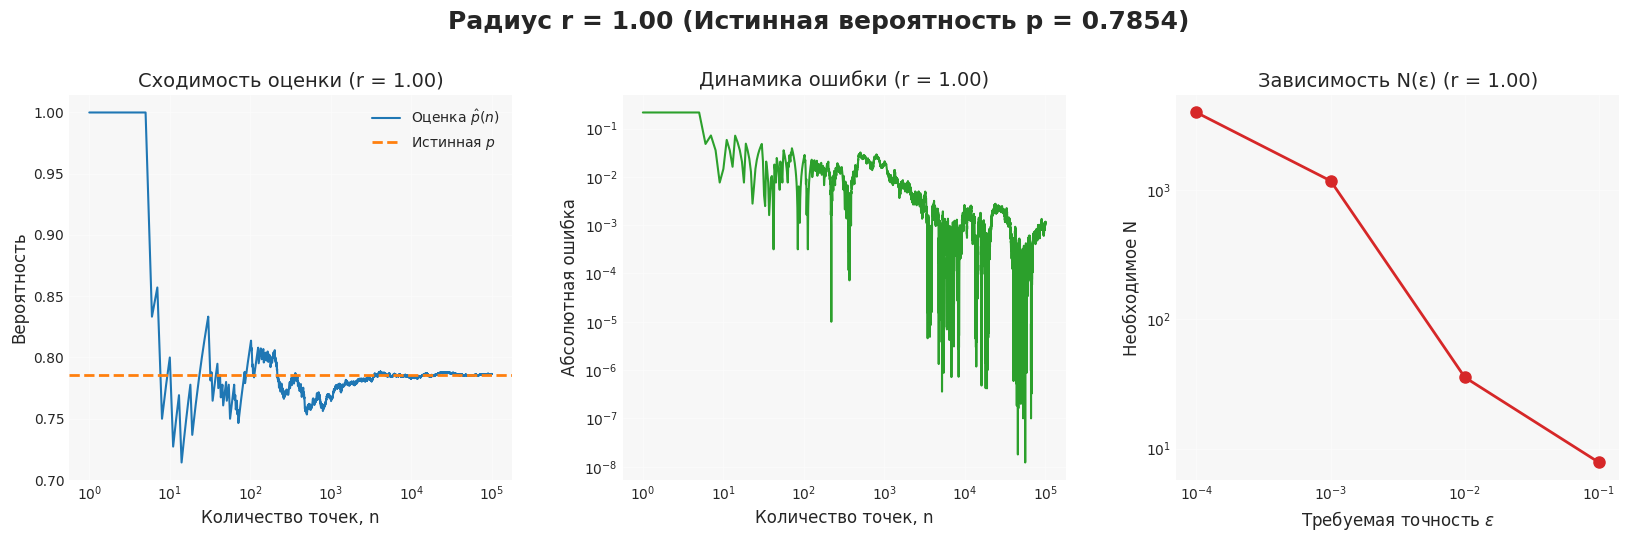

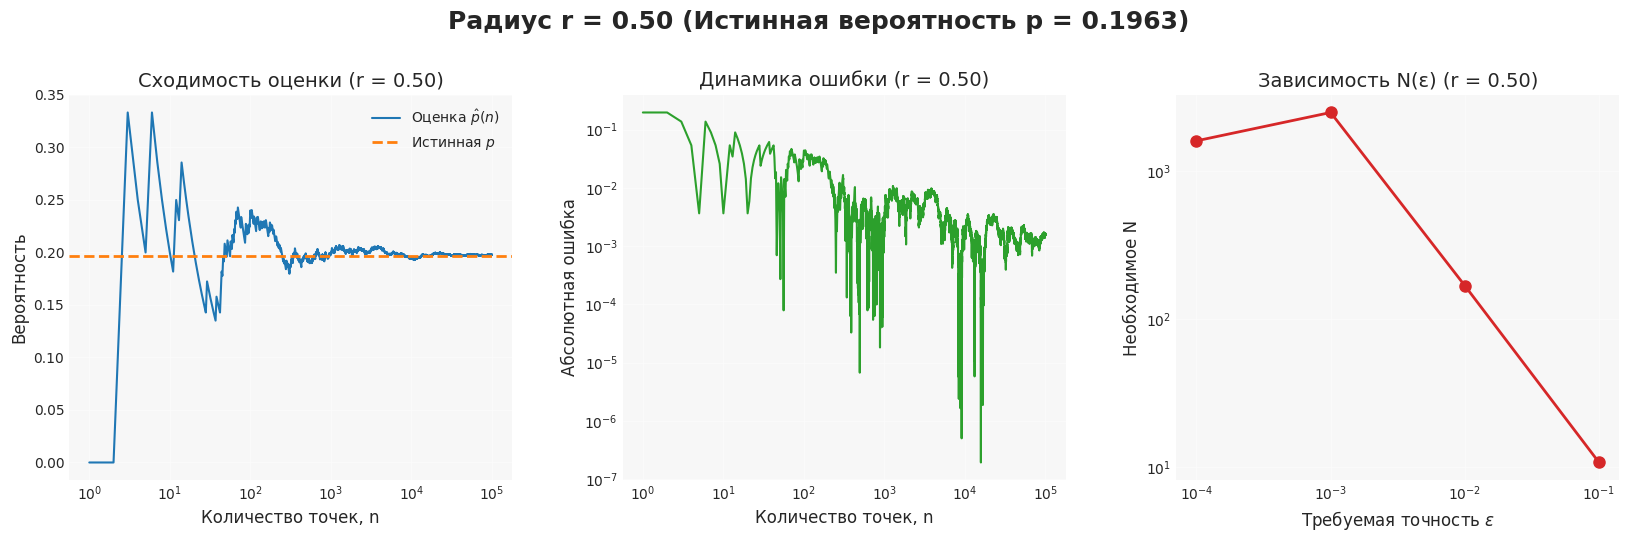

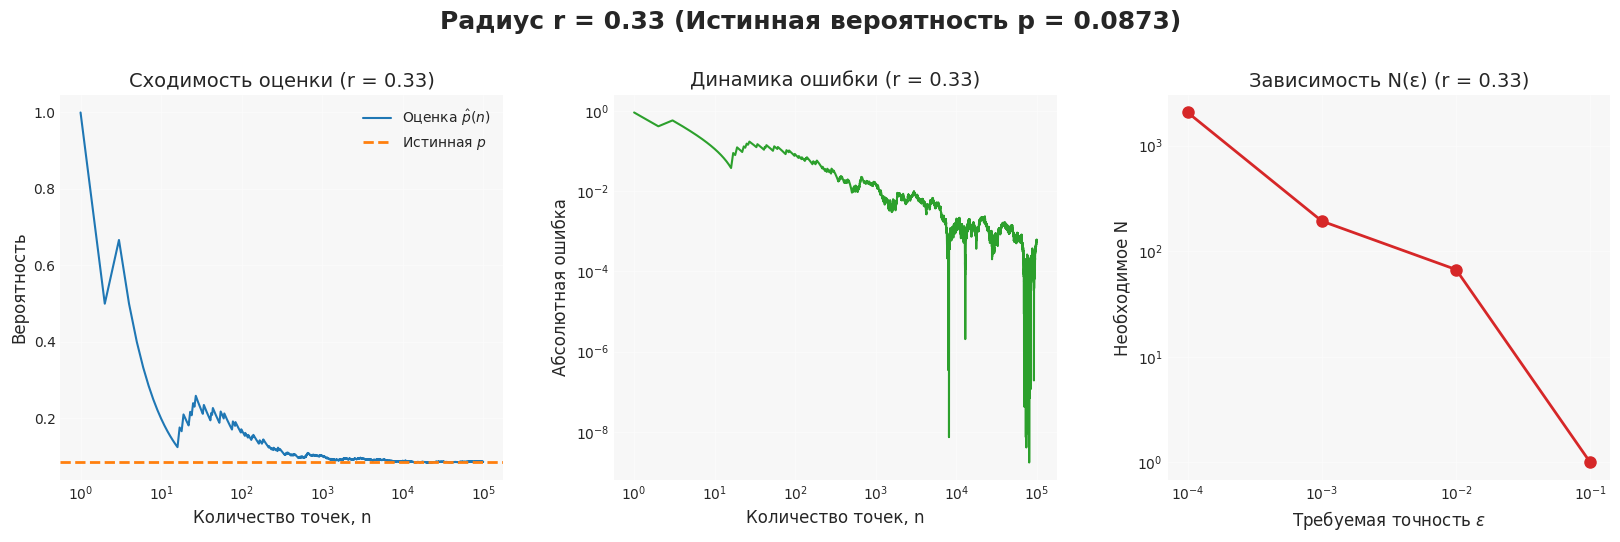

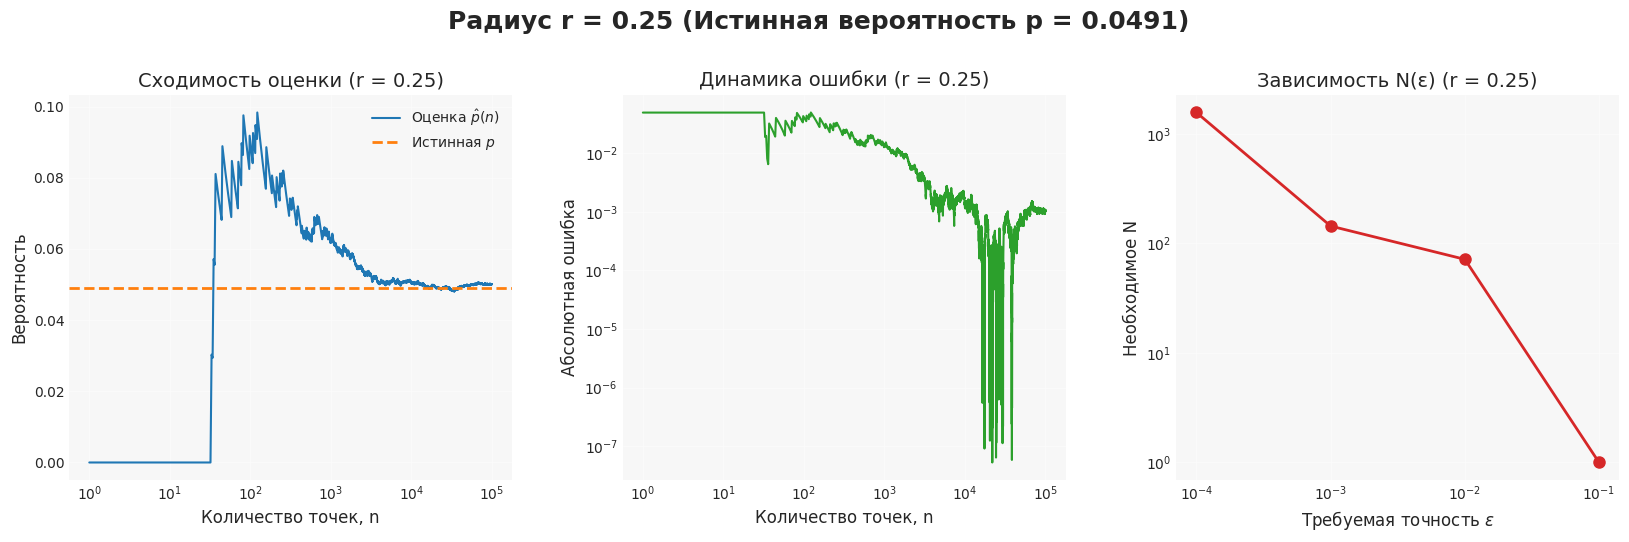

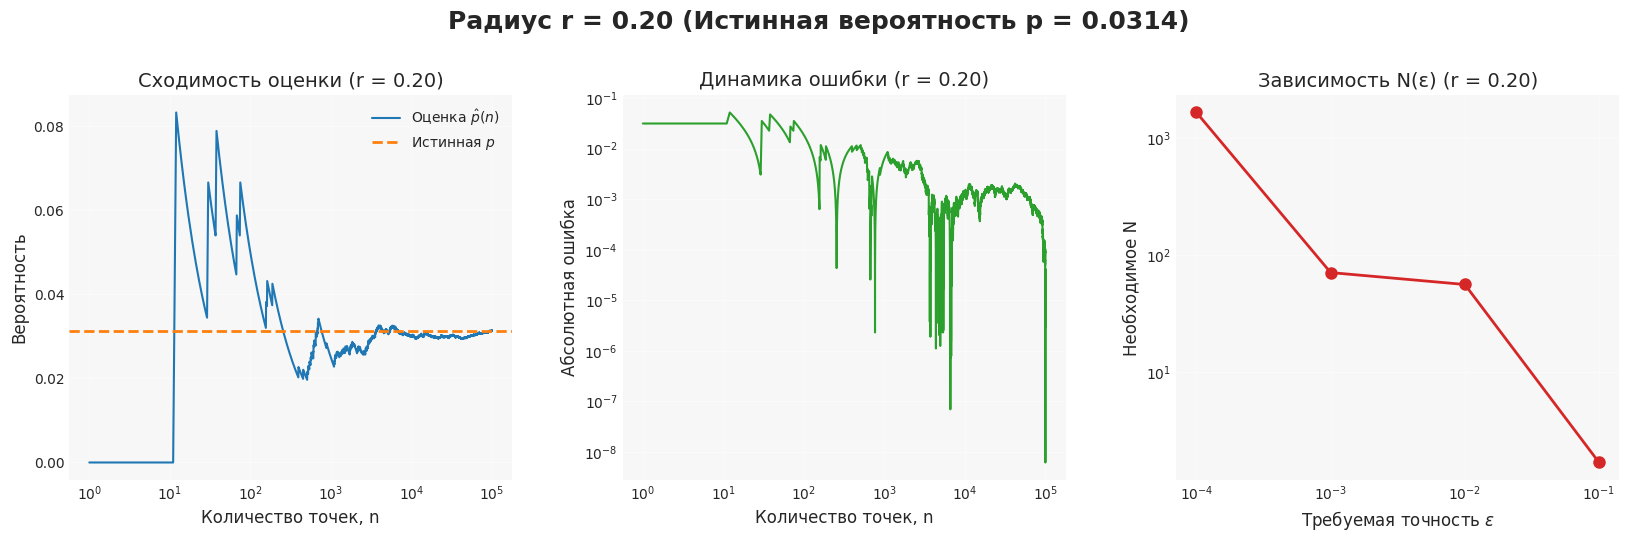

In [6]:
# Основной цикл выполнения
for r in radii:
    p = np.pi * r**2 / 4  # Истинная вероятность

    # Симуляция данных
    p_hat = simulate_points(r, max_points)
    n = np.arange(1, max_points + 1)
    error = np.abs(p_hat - p)
    N_eps = [find_N_for_epsilon(r, p, eps) for eps in epsilon_values]

    fig, (ax1, ax2, ax3) = plt.subplots(
        ncols=3,
        figsize=(20, 5),
        gridspec_kw={'wspace': 0.25, 'hspace': 0.4}
    )

    # График 1: Сходимость оценки
    ax1.plot(n, p_hat, lw=1.5, color='#1f77b4', label='Оценка $\hat{p}(n)$')
    ax1.axhline(p, color='#ff7f0e', ls='--', lw=2, label='Истинная $p$')
    ax1.set(
        xlabel='Количество точек, n',
        ylabel='Вероятность',
        title=f'Сходимость оценки (r = {r:.2f})',
        xscale='log'
    )
    ax1.legend()

    # График 2: Динамика ошибки
    ax2.plot(n, error, lw=1.5, color='#2ca02c')
    ax2.set(
        xlabel='Количество точек, n',
        ylabel='Абсолютная ошибка',
        title=f'Динамика ошибки (r = {r:.2f})',
        xscale='log',
        yscale='log'
    )

    # График 3: Зависимость N(ε)
    ax3.plot(epsilon_values, N_eps, 'o-', ms=8, color='#d62728', lw=2)
    ax3.set(
        xlabel='Требуемая точность $\epsilon$',
        ylabel='Необходимое N',
        title=f'Зависимость N(ε) (r = {r:.2f})',
        xscale='log',
        yscale='log'
    )

    fig.suptitle(
        f'Радиус r = {r:.2f} (Истинная вероятность p = {p:.4f})',
        y=1.05,
        fontsize=18,
        weight='bold'
    )

    for ax in [ax1, ax2, ax3]:
        ax.grid(alpha=0.4)
        ax.set_facecolor('#f7f7f7')

    plt.tight_layout()
    plt.show()
    print("\n\n\n")